In [19]:
import pandas as pd
import ML_ToolBox as tb
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, make_scorer, precision_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier


In [20]:
df = pd.read_csv("./data/titanic.csv")

In [21]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [22]:
df.info()
df.drop("Name", axis= 1, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
#mapping = {'yes': 1, 'no': 0}
#df['alive'] = df['alive'].map(mapping)

In [24]:
tb.describe_df(df)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Data_Type,int64,int64,int64,object,float64,int64,int64,object,float64,object,object
Missings(%),0.0,0.0,0.0,0.0,19.87,0.0,0.0,0.0,0.0,77.1,0.22
Unique_Values,891,2,3,2,88,7,7,681,248,147,3
Card(%),100.0,0.22,0.34,0.22,9.88,0.79,0.79,76.43,27.83,16.5,0.34


In [25]:
target = "Survived"

In [26]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

In [29]:
train_set.drop("PassengerId", axis = 1, inplace= True)
test_set.drop("PassengerId", axis = 1, inplace= True)

In [30]:
tb.get_features_cat_classification(df, target)

Error: 'Survived' no es una variable categórica en el dataframe.


In [31]:
tb.plot_features_cat_classification(df, target)

Error: 'Survived' no es una variable categórica en el dataframe.


In [32]:
tb.get_features_num_classification(df, target)

['Pclass', 'Parch', 'Fare']

<Figure size 1500x500 with 0 Axes>

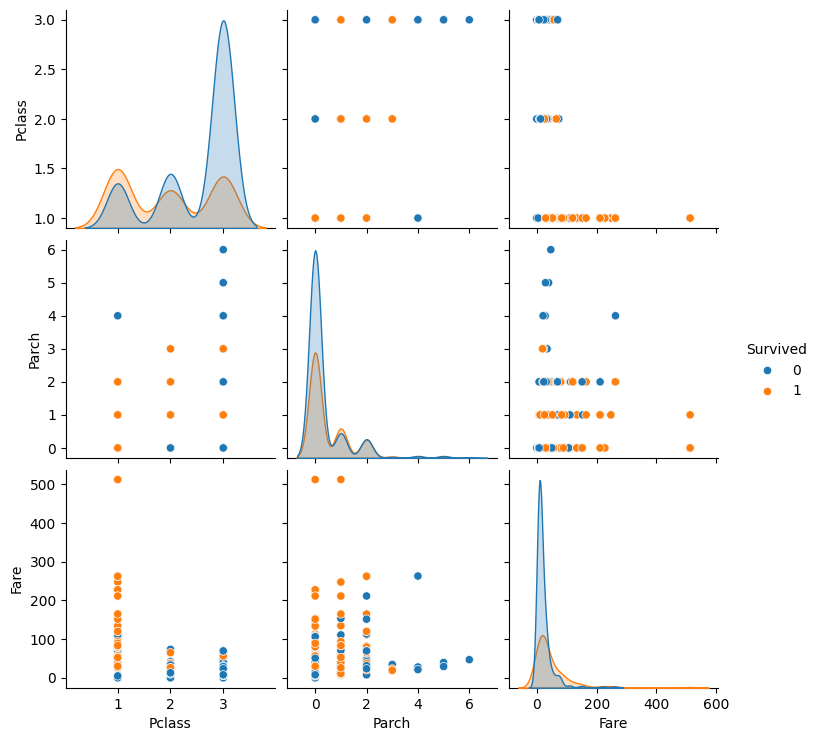

['Pclass', 'Parch', 'Fare']

In [33]:
tb.plot_features_num_classification(df, target)

In [34]:
tb.super_selector(df, target)

{'default': ['Pclass',
  'Sex',
  'Age',
  'SibSp',
  'Parch',
  'Ticket',
  'Fare',
  'Cabin',
  'Embarked'],
 'hard_voting': ['Pclass',
  'Sex',
  'Age',
  'SibSp',
  'Parch',
  'Ticket',
  'Fare',
  'Cabin',
  'Embarked']}

In [35]:
features = ['Pclass',
  'Sex',
  'Age',
  'SibSp',
  'Parch',
  'Fare',
  'Embarked']

In [36]:
X_train = train_set.drop(target, axis = 1)
X_test = test_set.drop(target, axis = 1)
y_train = train_set[target]
y_test = test_set[target]

In [37]:
X_train = X_train[features]
X_test = X_test[features]

In [38]:
X_train_scal = pd.get_dummies(X_train)
X_test_scal = pd.get_dummies(X_test)

In [39]:
X_test_scal

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
709,3,NaN,1,1,15.2458,False,True,True,False,False
439,2,31.0,0,0,10.5000,False,True,False,False,True
840,3,20.0,0,0,7.9250,False,True,False,False,True
720,2,6.0,0,1,33.0000,True,False,False,False,True
39,3,14.0,1,0,11.2417,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
433,3,17.0,0,0,7.1250,False,True,False,False,True
773,3,NaN,0,0,7.2250,False,True,True,False,False
25,3,38.0,1,5,31.3875,True,False,False,False,True
84,2,17.0,0,0,10.5000,True,False,False,False,True


In [40]:
from sklearn.metrics import accuracy_score


modelo_cb = CatBoostClassifier(iterations=100, random_state=42)
modelo_cb.fit(X_train_scal, y_train, cat_features=None)

# Predecir sobre el conjunto de prueba
predicciones_cb = modelo_cb.predict(X_test_scal)

# Calcular la precisión del modelo
precision_cb = accuracy_score(y_test, predicciones_cb)
print("Precisión del modelo CatBoost:", precision_cb)

Learning rate set to 0.073611
0:	learn: 0.6671474	total: 52.8ms	remaining: 5.22s
1:	learn: 0.6436712	total: 54.3ms	remaining: 2.66s
2:	learn: 0.6232287	total: 56.2ms	remaining: 1.82s
3:	learn: 0.6044506	total: 59.1ms	remaining: 1.42s
4:	learn: 0.5892826	total: 62.1ms	remaining: 1.18s
5:	learn: 0.5749140	total: 63.5ms	remaining: 994ms
6:	learn: 0.5607255	total: 66.2ms	remaining: 880ms
7:	learn: 0.5498649	total: 67.3ms	remaining: 774ms
8:	learn: 0.5382199	total: 69.6ms	remaining: 704ms
9:	learn: 0.5266832	total: 71.8ms	remaining: 646ms
10:	learn: 0.5165628	total: 73.4ms	remaining: 594ms
11:	learn: 0.5064246	total: 75.5ms	remaining: 554ms
12:	learn: 0.4983541	total: 76.6ms	remaining: 513ms
13:	learn: 0.4910464	total: 78ms	remaining: 479ms
14:	learn: 0.4836419	total: 79.7ms	remaining: 451ms
15:	learn: 0.4782531	total: 81.2ms	remaining: 426ms
16:	learn: 0.4713320	total: 82.8ms	remaining: 404ms
17:	learn: 0.4655116	total: 84.2ms	remaining: 384ms
18:	learn: 0.4599293	total: 85.3ms	remaining: 

In [49]:
report = classification_report(y_test, predicciones_cb)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.83      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



In [47]:
tb.eval_model(df,target="Survived",predictions="yes",problem_type="classification",metrics="ACCURACY")

()